In [66]:
#import all relevant libraries - mongo, pygal and pandas
import pymongo
from pymongo import MongoClient
import pygal
import pandas as pd

client = MongoClient()
db = client.ca2_python

collection = db.median_age

#filter data to show only first marriages values
collection.delete_many({"level_1" : "Grooms - Total Marriages"})
collection.delete_many({"level_1" : "Grooms - Remarriages"})
collection.delete_many({"level_1" : "Brides - Remarriages"})
collection.delete_many({"level_1" : "Brides - Total Marriages"})

list = []
for item in collection.find():
    list.append(item) #to show SQL output as a list
    
#converting list to pandas Dataframe
medage = pd.DataFrame(list)
med_age = medage.set_index('year')

#extracting brides - first marriages value
ma_fem = med_age['level_1'] == 'Brides - First Marriages'
med_fem = med_age[ma_fem]

list_fem = []
for a in med_fem['value']:
    list_fem.append(a) #to print values without indexes
    
#extracting grooms - first marriages value
ma_mal = med_age['level_1'] == 'Grooms - First Marriages'
med_mal = med_age[ma_mal]

list_mal = []
for b in med_mal['value']:
    list_mal.append(b) #to print values without indexes

line_chart = pygal.Line(x_label_rotation=90)
line_chart.title = 'Median ages of first marriages from 1961 to 2018'
line_chart.x_labels = map(str, range(1961, 2019))
line_chart.add('Females', list_fem)
line_chart.add('Males',  list_mal)

line_chart.render_to_file('median_age_line_chart.svg') #generate chart output as a file



Successfully loaded dataset median-age-of-grooms-and-brides-by-marriage-order.csv

These are the columns of the dataset
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ca2_python'), 'median_age')


In [82]:
import pandas as pd
import pygal

#total number of marriages by educational qualifications - grooms

#import data & indexing year column
filename = '/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA2/Datasets/first-marriages-for-couples-under-the-womens-charter-by-edu-qual-of-brides-grooms.csv'
data = pd.read_csv(filename, index_col = 'year')

#creating a boolean column for only total values
total = data.loc[:, 'level_1'] == 'Total'

#filtering the data to show only total values
data_total = data[total]

#filtering data to show grooms -  secondary & below
sec = data_total.loc[:, 'level_2'] == 'Grooms - Secondary & Below'
data_sec = data_total[sec]

list_sec = []
for a in data_sec['value']:
    list_sec.append(a)
    
#filtering data to show grooms - post-secondary
postsec = data_total.loc[:, 'level_2'] == 'Grooms - Post-secondary'
data_postsec = data_total[postsec]


list_postsec = []
for b in data_postsec['value']:
    list_postsec.append(b)

#filtering data to show grooms - university
uni = data_total.loc[:, 'level_2'] == 'Grooms - University'
data_uni = data_total[uni]

list_uni = []
for c in data_uni['value']:
    list_uni.append(c)
    
bar_chart = pygal.Bar(x_label_rotation=90)
bar_chart.title = 'Number of First marriages for couples based on educational qualifications'
bar_chart.x_labels = map(str, range(1984, 2020))
bar_chart.add('Secondary and below', list_sec)
bar_chart.add('Post-Secondary', list_postsec)
bar_chart.add('University', list_uni)
bar_chart.render_to_file('first_marriages_bar_chart.svg') #generate chart output as a file

#generating sinple text-based analysis using pandas
print('Successfully loaded dataset', filename)
print()
print('This is the shape of the dataset')
print(data.shape)
print()
print('This is the index of the dataset')
print(data.index)
print()
print('These are the columns in the dataset')
print(data.columns)
print()
print('The total number of non-NA values in this dataset is:')
print(data.isna().count())
print()
print('A summary of this dataset is shown below:')
print(data.info())
print()
print('There are', data_sec.shape[0], 'rows and', data_sec.shape[1], 'columns of data categorised under "Grooms - Secondary & Below"')
print(data_sec.describe())
print()
print('There are', data_uni.shape[0], 'rows and', data_uni.shape[1], 'columns of data categorised under "Grooms - University"')
print(data_uni.describe())
print()
print('There are', data_postsec.shape[0], 'rows and', data_postsec.shape[1], 'columns of data categorised under "Grooms - Post-secondary"')
print(data_postsec.describe())



Successfully loaded dataset /Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA2/Datasets/first-marriages-for-couples-under-the-womens-charter-by-edu-qual-of-brides-grooms.csv

This is the shape of the dataset
(432, 3)

This is the index of the dataset
Int64Index([1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='year', length=432)

These are the columns in the dataset
Index(['level_1', 'level_2', 'value'], dtype='object')

The total number of non-NA values in this dataset is:
level_1    432
level_2    432
value      432
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 1984 to 2019
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_1  432 non-null    object
 1   level_2  432 non-null    object
 2   val

In [20]:
import pandas as pd
import pygal

#total number of marriages by educational qualifications - grooms

#import data & indexing year column
data = pd.read_csv('/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA2/Datasets/first-marriages-for-couples-under-the-womens-charter-by-edu-qual-of-brides-grooms.csv', index_col = 'year')

#creating a boolean column for only total values
total = data.loc[:, 'level_1'] == 'Total'

#filtering the data to show only total values
data_total = data[total]

#filtering data to show number of marriages - groom in 2019
gr2019 = data_total.index == 2019
data_gr2019 = data_total[gr2019]
print(data_gr2019)

val_gr2019 = []
for i in data_gr2019['value']:
    val_gr2019.append(i)    

pie_chart = pygal.Pie(inner_radius=.75)
pie_chart.title = 'Percentage of marriages - grooms based on educational qualification in 2019'
pie_chart.add('Grooms - Secondary & Below', val_gr2019[0])
pie_chart.add('Grooms - Post-secondary', val_gr2019[1])
pie_chart.add('Grooms - University', val_gr2019[2])
pie_chart.render_to_file('grooms_first_marriages_pie_chart.svg')

     level_1                     level_2  value
year                                           
2019   Total  Grooms - Secondary & Below   1203
2019   Total     Grooms - Post-secondary   4092
2019   Total         Grooms - University  10172


In [21]:
import pandas as pd
import pygal

#total number of marriages by educational qualifications - brides

#import data & indexing year column
data = pd.read_csv('/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA2/Datasets/first-marriages-for-couples-under-the-womens-charter-by-edu-qualification-of-brides.csv', index_col = 'year')

#filtering data to show number of marriages - brides in 2019, without showing total values
br2019 = data.index == 2019
data_br2019 = data[br2019]
data_br2019 = data_br2019[data_br2019.level_1.isin(['Brides - Secondary & Below', 'Brides - Post-secondary', 'Brides - University'])]
print(data_br2019)

val_br2019 = []
for i in data_br2019['value']:
    val_br2019.append(i)    

pie_chart = pygal.Pie(inner_radius=.75)
pie_chart.title = 'Percentage of marriages - brides based on educational qualification in 2019'
pie_chart.add('Brides - Secondary & Below', val_br2019[0])
pie_chart.add('Brides - Post-secondary', val_br2019[1])
pie_chart.add('Brides - University', val_br2019[2])
pie_chart.render_to_file('brides_first_marriages_pie_chart.svg')

                         level_1  value
year                                   
2019  Brides - Secondary & Below   1044
2019     Brides - Post-secondary   3373
2019         Brides - University  11050


                         level_1            level_2  value
year                                                      
1984  First Marriages For Grooms  Secondary & Below   26.6
1984  First Marriages For Brides  Secondary & Below   23.9
1985  First Marriages For Grooms  Secondary & Below   26.7
1985  First Marriages For Brides  Secondary & Below   23.9
1986  First Marriages For Grooms  Secondary & Below   26.8
...                          ...                ...    ...
2016  First Marriages For Brides  Secondary & Below   27.2
2017  First Marriages For Grooms  Secondary & Below   30.3
2017  First Marriages For Brides  Secondary & Below   27.4
2018  First Marriages For Grooms  Secondary & Below   30.5
2018  First Marriages For Brides  Secondary & Below   27.9

[70 rows x 3 columns]


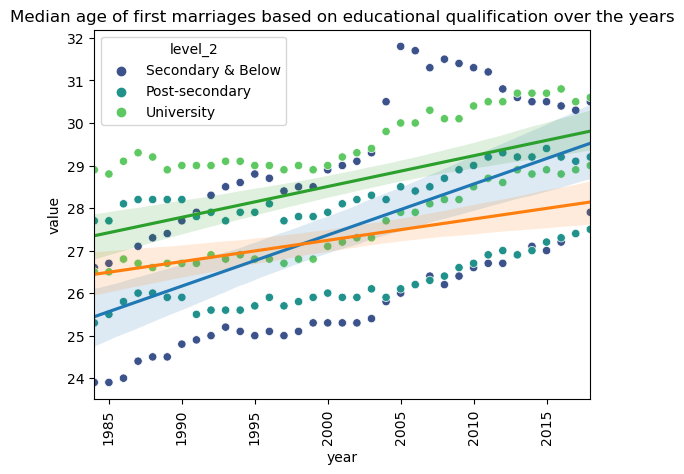

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#median-age-at-first-marriage-of-grooms-and-brides-by-educational-qualification

data_edu = pd.read_csv('/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA2/Datasets/median-age-at-first-marriage-of-grooms-and-brides-by-educational-qualification.csv', 
                       index_col = 'year')

ax = sns.scatterplot(x=data_edu.index, y=data_edu['value'], hue = data_edu['level_2'], 
                     palette = 'viridis')

#separating the data to different groups
sec = data_edu['level_2'] == 'Secondary & Below'
postsec = data_edu['level_2'] == 'Post-secondary'
uni = data_edu['level_2'] == 'University'

data_sec = data_edu[sec]
data_postsec = data_edu[postsec]
data_uni = data_edu[uni]

sns.regplot(data=data_sec, x=data_sec.index, y=data_sec['value'], scatter=False, ax=ax)
sns.regplot(data=data_postsec, x=data_postsec.index, y=data_postsec['value'], scatter=False, ax=ax)
sns.regplot(data=data_uni, x=data_uni.index, y=data_uni['value'], scatter=False, ax=ax)
plt.title('Median age of first marriages based on educational qualification over the years')
plt.xticks(rotation=90)


plt.show()



In [37]:
import pandas as pd
import pygal

#divorces-under-the-womens-charter-by-duration-of-marriage

datadiv = pd.read_csv('/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA2/Datasets/divorces-under-the-womens-charter-by-duration-of-marriage.csv', 
                      index_col = 'year')

#5 and below years of marriage
cat1 = datadiv['level_2'] == 'Under 5 Years'
cat1data = datadiv[cat1]

list1 = []
for a in cat1data['value']:
    list1.append(a)

#5-9 Years
cat2 = datadiv['level_2'] == '5-9 Years'
cat2data = datadiv[cat2]

list2 = []
for b in cat2data['value']:
    list2.append(b)

#10-14 Years
cat3 = datadiv['level_2'] == '10-14 Years'
cat3data = datadiv[cat3]

list3 = []
for c in cat3data['value']:
    list3.append(c)

#15-19 Years
cat4 = datadiv['level_2'] == '15-19 Years'
cat4data = datadiv[cat4]

list4 = []
for d in cat4data['value']:
    list4.append(d)

#20-24 Years
cat5 = datadiv['level_2'] == '20-24 Years'
cat5data = datadiv[cat5]

list5 = []
for e in cat5data['value']:
    list5.append(e)

#25-29 Years
cat6 = datadiv['level_2'] == '25-29 Years'
cat6data = datadiv[cat6]

list6 = []
for f in cat6data['value']:
    list6.append(f)

#30 Years & Over
cat7 = datadiv['level_2'] == '30 Years & Over'
cat7data = datadiv[cat7]

list7 = []
for g in cat7data['value']:
    list7.append(g)

bar_chart = pygal.StackedBar(x_label_rotation=90)
bar_chart.title = 'Divorces by duration'
bar_chart.x_labels = map(str, range(1980, 2018))
bar_chart.add('Under 5 Years', list1)
bar_chart.add('5-9 Years', list2)
bar_chart.add('10-14 Years', list3)
bar_chart.add('15-19 Years', list4)
bar_chart.add('20-24 Years', list5)
bar_chart.add('25-29 Years', list6)
bar_chart.add('30 Years & Over', list7)
bar_chart.render_to_file('divorces_duration_stacked_bar.svg')


file:///var/folders/7q/p59p8zl57m33h1n1qpj4syr00000gn/T/tmpc1_utqiu.html


In [34]:
# importing the modules
from bokeh.plotting import figure, output_file, show
import pandas as pd


#median-age-at-first-marriage-of-grooms-and-brides-by-educational-qualification

data_edu = pd.read_csv('/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA2/Datasets/median-age-at-first-marriage-of-grooms-and-brides-by-educational-qualification.csv', index_col = 'year')

#separating the data to different groups
sec = data_edu['level_2'] == 'Secondary & Below'
postsec = data_edu['level_2'] == 'Post-secondary'
uni = data_edu['level_2'] == 'University'

data_sec = data_edu[sec]
data_postsec = data_edu[postsec]
data_uni = data_edu[uni]

# file to save the model
output_file("median_age_qualifications.html")

# instantiating the figure object
graph = figure(title = "Median age of first marriages based on educational qualification over the years")

# name of the x-axis
graph.xaxis.axis_label = "Year"

# name of the y-axis
graph.yaxis.axis_label = "Median age"

# plotting Secondary and below
# generating the points to be plotted
x = range(1984,2019)
y1 = []
for i in data_sec['value']:
    y1.append(i)

# parameters of Secondary and below
line_color = "red"
line_dash = "solid"
legend_label = "Secondary and below"

# plotting the line
graph.line(x, y1,
    line_color = line_color,
    line_dash = line_dash,
    legend_label = legend_label)

# plotting Post-secondary
# generating the points to be plotted
y2 = []
for i in data_postsec['value']:
    y2.append(i)

# parameters of Post-secondary
line_color = "green"
line_dash = "dotdash"
line_dash_offset = 1
legend_label = "Post-secondary"

# plotting the line
graph.line(x, y2,
    line_color = line_color,
    line_dash = line_dash,
    line_dash_offset = line_dash_offset,
    legend_label = legend_label)

# plotting University
# generating the points to be plotted
y3 = []
for i in data_uni['value']:
    y3.append(i)

# parameters of University
line_color = "blue"
line_dash = "dashed"
line_dash_offset = 1
legend_label = "University"

# plotting the line
graph.line(x, y3,
    line_color = line_color,
    line_dash = line_dash,
    line_dash_offset = line_dash_offset,
    legend_label = legend_label)

# displaying the model
show(graph)
                                                                                                 

In [43]:
import pandas as pd
import pygal

#total number of marriages by educational qualifications - brides

#import data & indexing year column
data = pd.read_csv('/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA2/Datasets/first-marriages-for-couples-under-the-womens-charter-by-edu-qualification-of-brides.csv', index_col = 'year')

#filtering data to show Brides -  secondary & below
sec = data.loc[:, 'level_1'] == 'Brides - Secondary & Below'
data_sec = data[sec]
print('There are', data_sec.shape[0], 'rows and', data_sec.shape[1], 'columns of data categorised under "Brides - Secondary & Below"')
print(data_sec.describe())

list_sec = []
for a in data_sec['value']:
    list_sec.append(a)
    
#filtering data to show Brides - post-secondary
postsec = data.loc[:, 'level_1'] == 'Brides - Post-secondary'
data_postsec = data[postsec]
print('There are', data_postsec.shape[0], 'rows and', data_postsec.shape[1], 'columns of data categorised under "Brides - Post-secondary"')
print(data_postsec.describe())

list_postsec = []
for b in data_postsec['value']:
    list_postsec.append(b)

#filtering data to show Brides - university
uni = data.loc[:, 'level_1'] == 'Brides - University'
data_uni = data[uni]
print('There are', data_uni.shape[0], 'rows and', data_uni.shape[1], 'columns of data categorised under "Brides - University"')
print(data_uni.describe())

list_uni = []
for c in data_uni['value']:
    list_uni.append(c)
    
bar_chart = pygal.Bar(x_label_rotation=90)
bar_chart.title = 'Number of First marriages for couples based on educational qualifications'
bar_chart.x_labels = map(str, range(1984, 2020))
bar_chart.add('Secondary and below', list_sec)
bar_chart.add('Post-Secondary', list_postsec)
bar_chart.add('University', list_uni)
bar_chart.render_to_file('first_marriages_bar_chartF.svg') #generate chart output as a file


There are 36 rows and 2 columns of data categorised under "Brides - Secondary & Below"
              value
count     36.000000
mean    6890.111111
std     4665.057732
min     1044.000000
25%     2817.250000
50%     5603.500000
75%    11453.250000
max    15584.000000
There are 36 rows and 2 columns of data categorised under "Brides - Post-secondary"
             value
count    36.000000
mean   3976.972222
std     917.265517
min    1774.000000
25%    3631.750000
50%    4313.500000
75%    4594.750000
max    5267.000000
There are 36 rows and 2 columns of data categorised under "Brides - University"
              value
count     36.000000
mean    5858.333333
std     3712.142947
min      899.000000
25%     2481.250000
50%     5561.500000
75%     9083.500000
max    11991.000000


In [83]:
#import all relevant libraries - mongo, pygal and pandas
import pymongo
from pymongo import MongoClient
import pygal
import pandas as pd

#total-divorces-by-sex-of-divorcees-annual

client = MongoClient()
db = client.ca2_python

collection = db.divorcerates

#filter data to show only unique values
collection.delete_many({"level_1" : "Total Female Divorcees"})

#update 2020 values
collection.insert_one({"year": 2020, "level_1" : "Total Male Divorcees", "value" : 6959})

list_1 = []
for item in collection.find():
    list_1.append(item) #to show SQL output as a list 
    
#converting list to pandas Dataframe
divage = pd.DataFrame(list_1)
div_age = divage.set_index('year')

list_mal = []
for a in div_age['value']:
    list_mal.append(a) #to print values without indexes
    
line_chart = pygal.Line(x_label_rotation=90)
line_chart.title = 'Divorce rates from 1981 to 2000'
line_chart.x_labels = map(str, range(1981, 2021))
line_chart.add('Divorce rates', list_mal)

line_chart.render_to_file('divorce_rates_line_chart.svg') #generate chart output as a file